# Predicción de Riesgo Cardiaco

### Objetivos

*   Construir un modelo de vecinos cercanos (KNN)
*   Contruir un modelo Random Forest
*   Comparar el rendimiento de ambos modelos



Importar las librerias



In [94]:
import os
import platform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Recolectar Datos


In [95]:
if os.access('heart.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv > heart.csv
    else:
        !wget heart.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv

Armar el DF

In [96]:
df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Caracteristicas del DataSet

* age: Edad
* sex: Género
* cp: Dolor
* trestbps: Presión
* chol: Colesterol
* fbs: Azúcar
* restecg: Electrocardiograma
* thalach: Frecuencia
* exang: Angina
* oldpeak: Descenso
* slope: Pendiente
* ca: Vasos
* thal: Thalassemia
* target: Diagnóstico

# Procesar Datos

In [97]:
# Buscar datos faltantes
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['Nan%'] = (df.isna().mean()) * 100
des


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Nan%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Explorar Datos


Identificar si el dataset se encuentra correctamente balanceado (entre pacientes con y sin enfermedad cardíaca.

Personas con enfermedad cardiaca,165
Personas sin enfermedad cardiaca,138
Contamos con 303 filas y 14 columnas


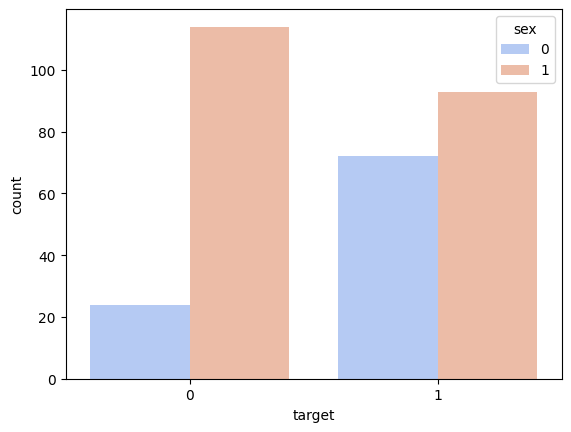

In [98]:
conteo = df['target'].value_counts()

# Imprimir el conteo
print(f'Personas con enfermedad cardiaca,{conteo[1]}')
print(f'Personas sin enfermedad cardiaca,{conteo[0]}')
print(f'Contamos con {df.shape[0]} filas y {df.shape[1]} columnas')

sns.countplot(data=df, x="target", hue="sex", palette="coolwarm")
plt.show()


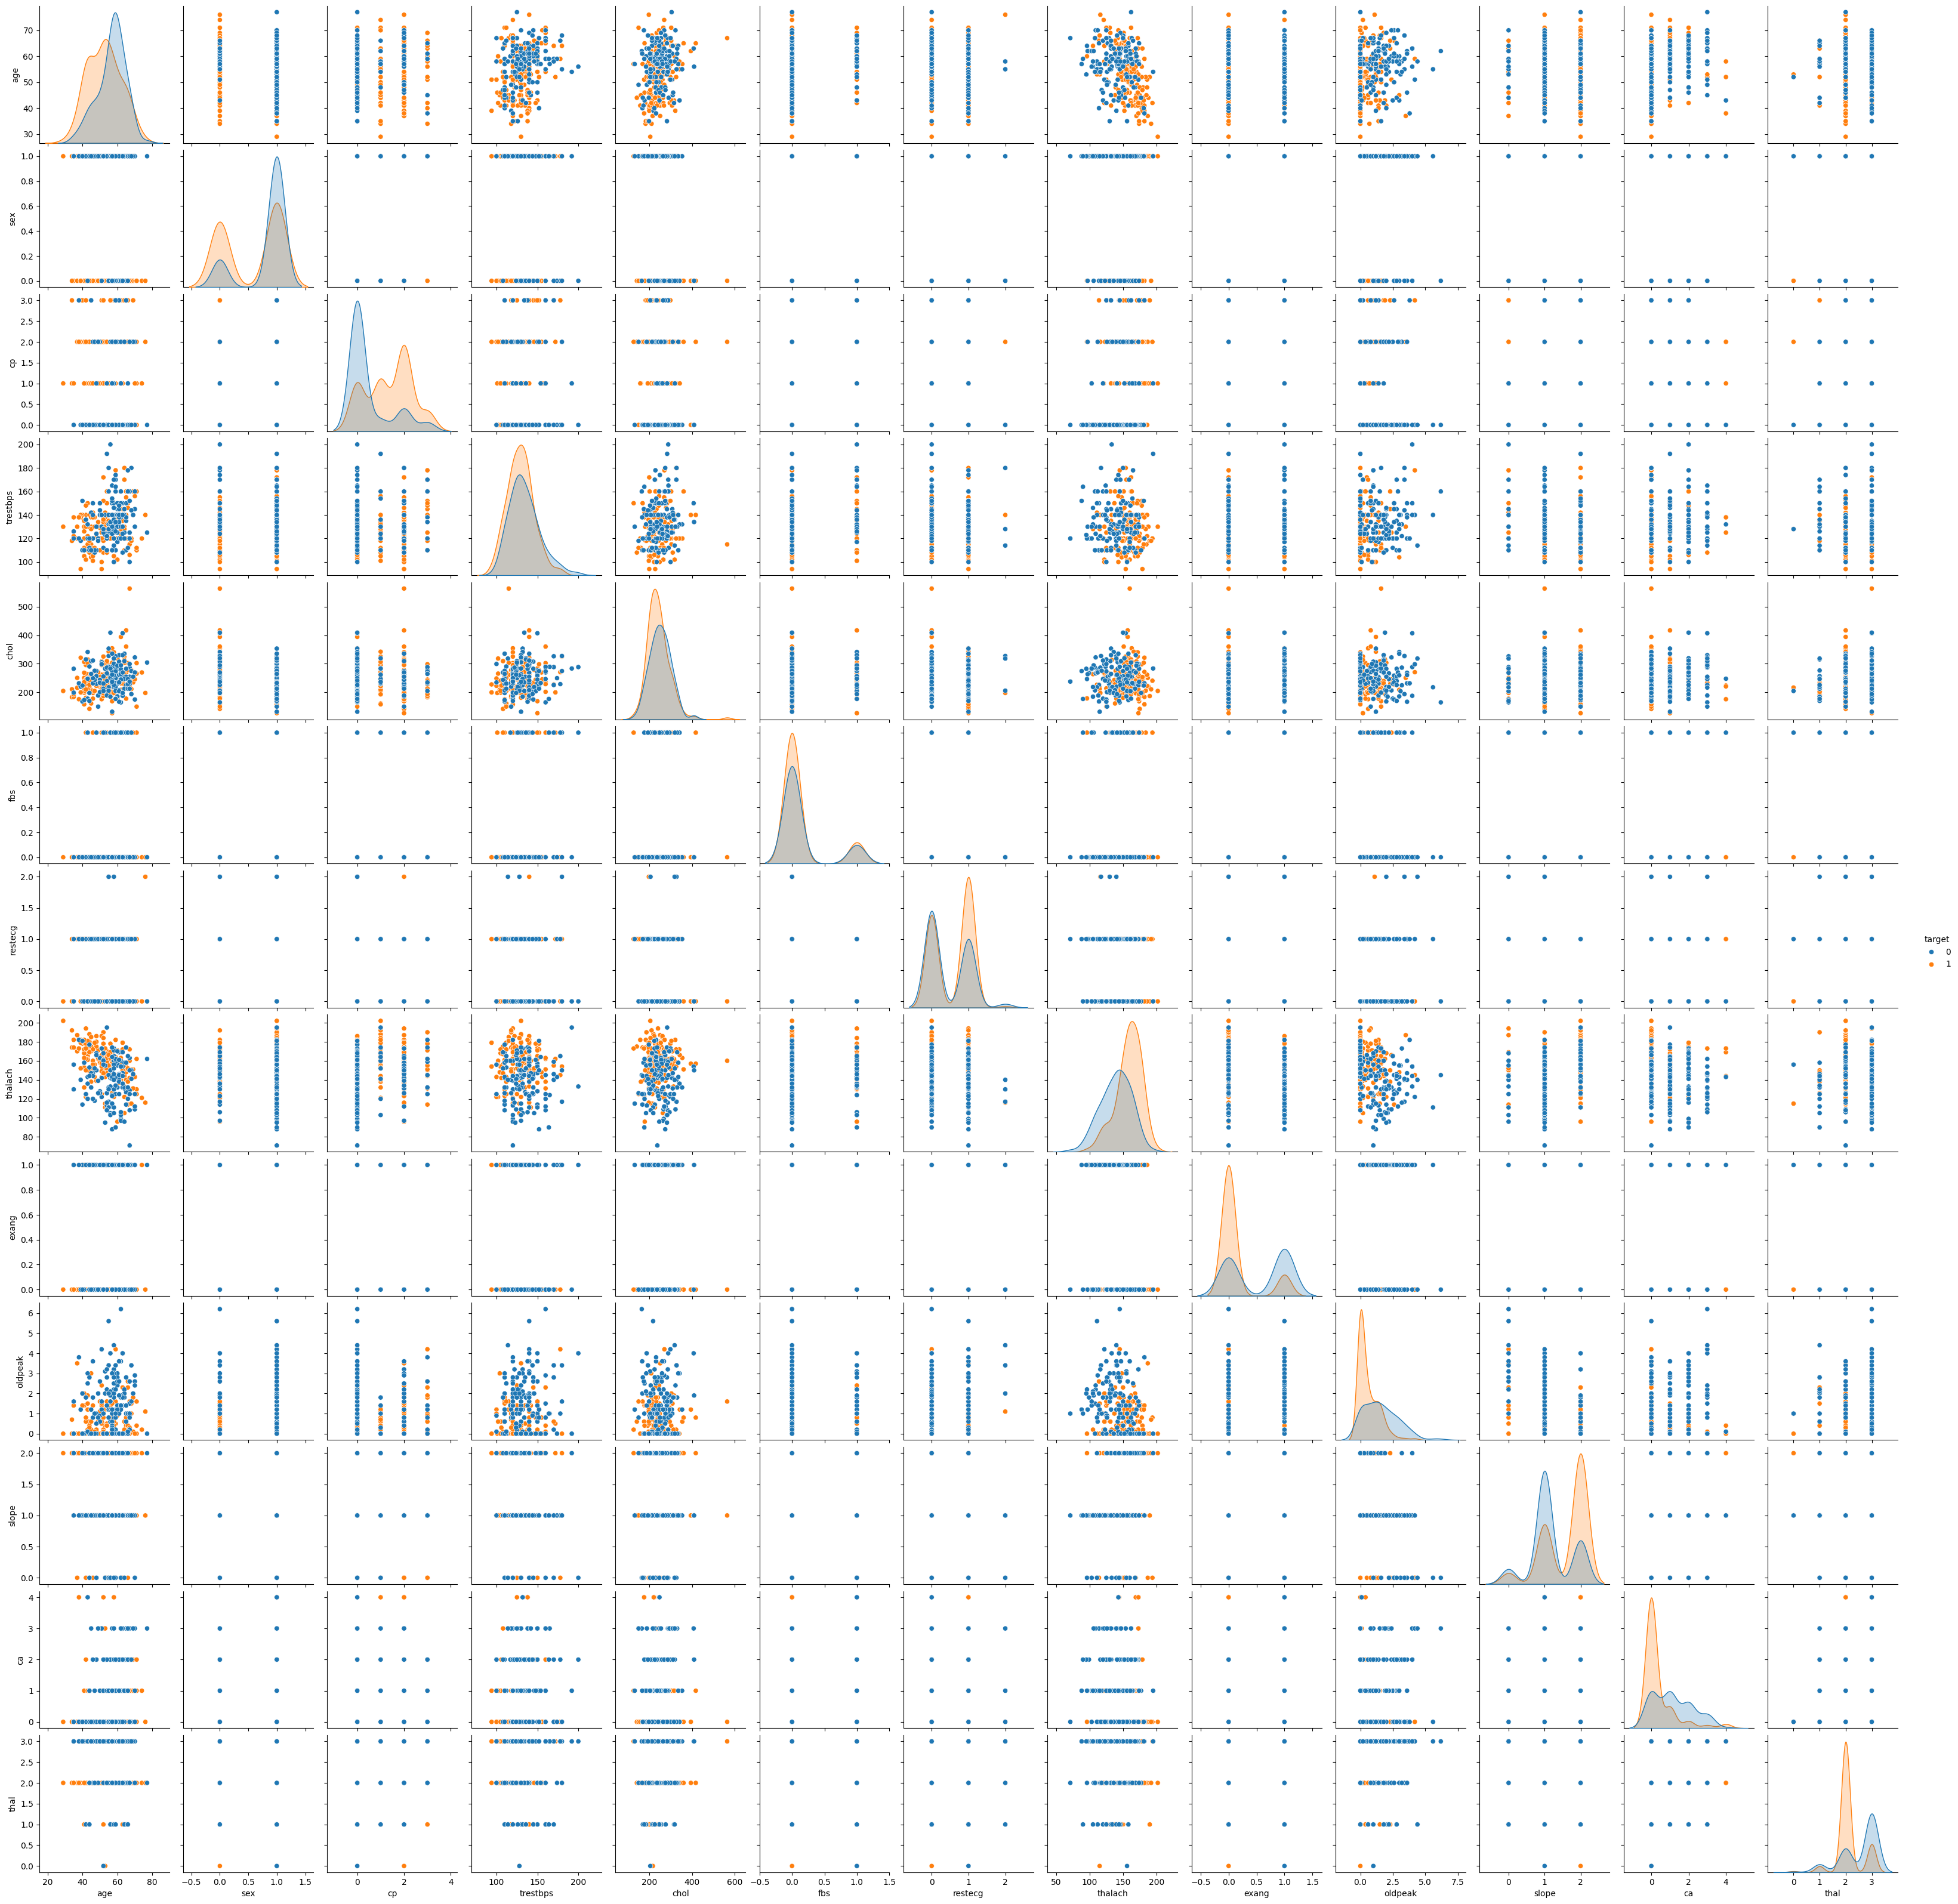

In [99]:
#df.info()
#df.columns

sns.pairplot(df, hue='target')
plt.show()

# Entenar modelos **KNN**

In [100]:
# Normalización de datos
# Se importa la herramienta de sklearn.preprocessing como StandardScaler
from sklearn.preprocessing import StandardScaler

# Se crea una copia del DataFrame df_clean a df_norm
df_norm = df.copy()

# Definimos las columnas que vamos a normalizar
cols_norm = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Normalizar los datos
scaler = StandardScaler()
df_norm[cols_norm] = scaler.fit_transform(df_norm[cols_norm])


# Ver el DF normalizado
df_norm.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,-0.714429,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,-0.714429,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,-0.714429,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,-0.714429,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,-0.714429,2,1


Obtener los datos de entrada y salida del modelo

In [117]:
X = df_norm.drop('target', axis=1).values
y = df_norm['target'].values
X.shape

(303, 13)

In [122]:
# Dividir el dataset en valores de Train y Test
from sklearn.model_selection import train_test_split

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=42)


Usamos la validación cruzada para encontrar el n_neighnors que más se ajuste al modelo

In [123]:
# Definir n_neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definir el modelo
knn = KNeighborsClassifier()

# Definir el rango de valores para n_neighbors
param_grid = {'n_neighbors': list(range(1, 21))}  # Probar valores entre 1 y 20

# Usar GridSearchCV para buscar el mejor valor de n_neighbors
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo en los datos de entrenamiento
grid_search.fit(X_train_knn, y_train_knn)

# Mostrar el mejor valor de n_neighbors
print(f"Mejor valor de n_neighbors: {grid_search.best_params_['n_neighbors']}")

# Mostrar la mejor precisión obtenida
print(f"Mejor precisión obtenida: {grid_search.best_score_:.2f}")


Mejor valor de n_neighbors: 7
Mejor precisión obtenida: 0.80


In [125]:
from sklearn.neighbors import KNeighborsClassifier
# Se entrena el modelo clasificador KNN con el método .fit()
# Como se conoce la cantidad los grupos de frutas, se tiene conocimiento de
# los tres grupos que existen en el dataset
# Para luego utilizar .predict() a partir de clf
clf_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train_knn,y_train_knn)
y_hat_knn = clf_knn.predict(X_test_knn)

# Validar Modelo **KNN**

In [126]:
# Calcular la exactitud (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test_knn, y_hat_knn, normalize=True)

0.8360655737704918

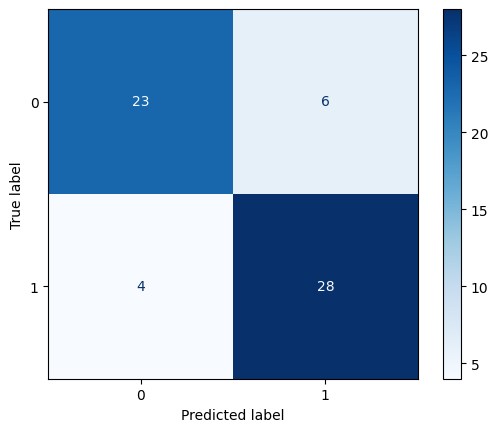

In [128]:
# Se utliza la matriz de confusión para evaluar la precisión de una clasificación.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Necesita dos variables que contengan los valores a comparar
cm = confusion_matrix(y_test_knn, y_hat_knn)

# Código para realizar la representación gráfica con los resultados
# Se crea la varible cmd, que almacena visualization de la Confusion Matrix
# Necesita la variable cm que contiene los resultados de la comparación entre los valores reales y predicción
# display_labels, se especifica las etiquetas de las categorias que se evalúan.
cmd_knn = ConfusionMatrixDisplay(cm, display_labels=clf_knn.classes_)


# Con cmd.plot se especifica el mapa de colores reconocido por matplotlib.
cmd_knn.plot(cmap=plt.cm.Blues)

# Para mostrar la figura
plt.show()

Conclusiones: con el modelo de vecinos cercanos logramos alcanzar un precisión del 83%. El modelo acierta 51 veces y se equivoca 10 veces. Predice que SÍ es propenso a sufrir una enfermedad cardiaca, cuando en realidad no es así por 4 veces y pronostica que NO es propenso a sufrir una enfermedad cardiaca cuando no es cierto por 6 veces.

# Entrenar modelo Random Forest

In [129]:
# Obtener valores de X y Y
X = df.drop('target', axis=1).values
y = df['target'].values

Dividir los datos en train y test

In [130]:
# Se importa la herramienta de sklearn.model_selectionl como train_test_split
from sklearn.model_selection import train_test_split

#se genere nuevos valores aleatorios
# y los conjuntos de datos de entrenamiento y pruebas serán diferentes.

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)

Crear un modelo de clasificacion con Random Forest

In [132]:
# Se importa la herramienta de sklearn.ensemble como RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=14, max_depth=5, criterion='entropy', random_state=0)
clf_rf.fit(X_train_rf, y_train_rf)
y_hat_rf = clf_rf.predict(X_test_rf)




# Ver el gráfico del Random Forest

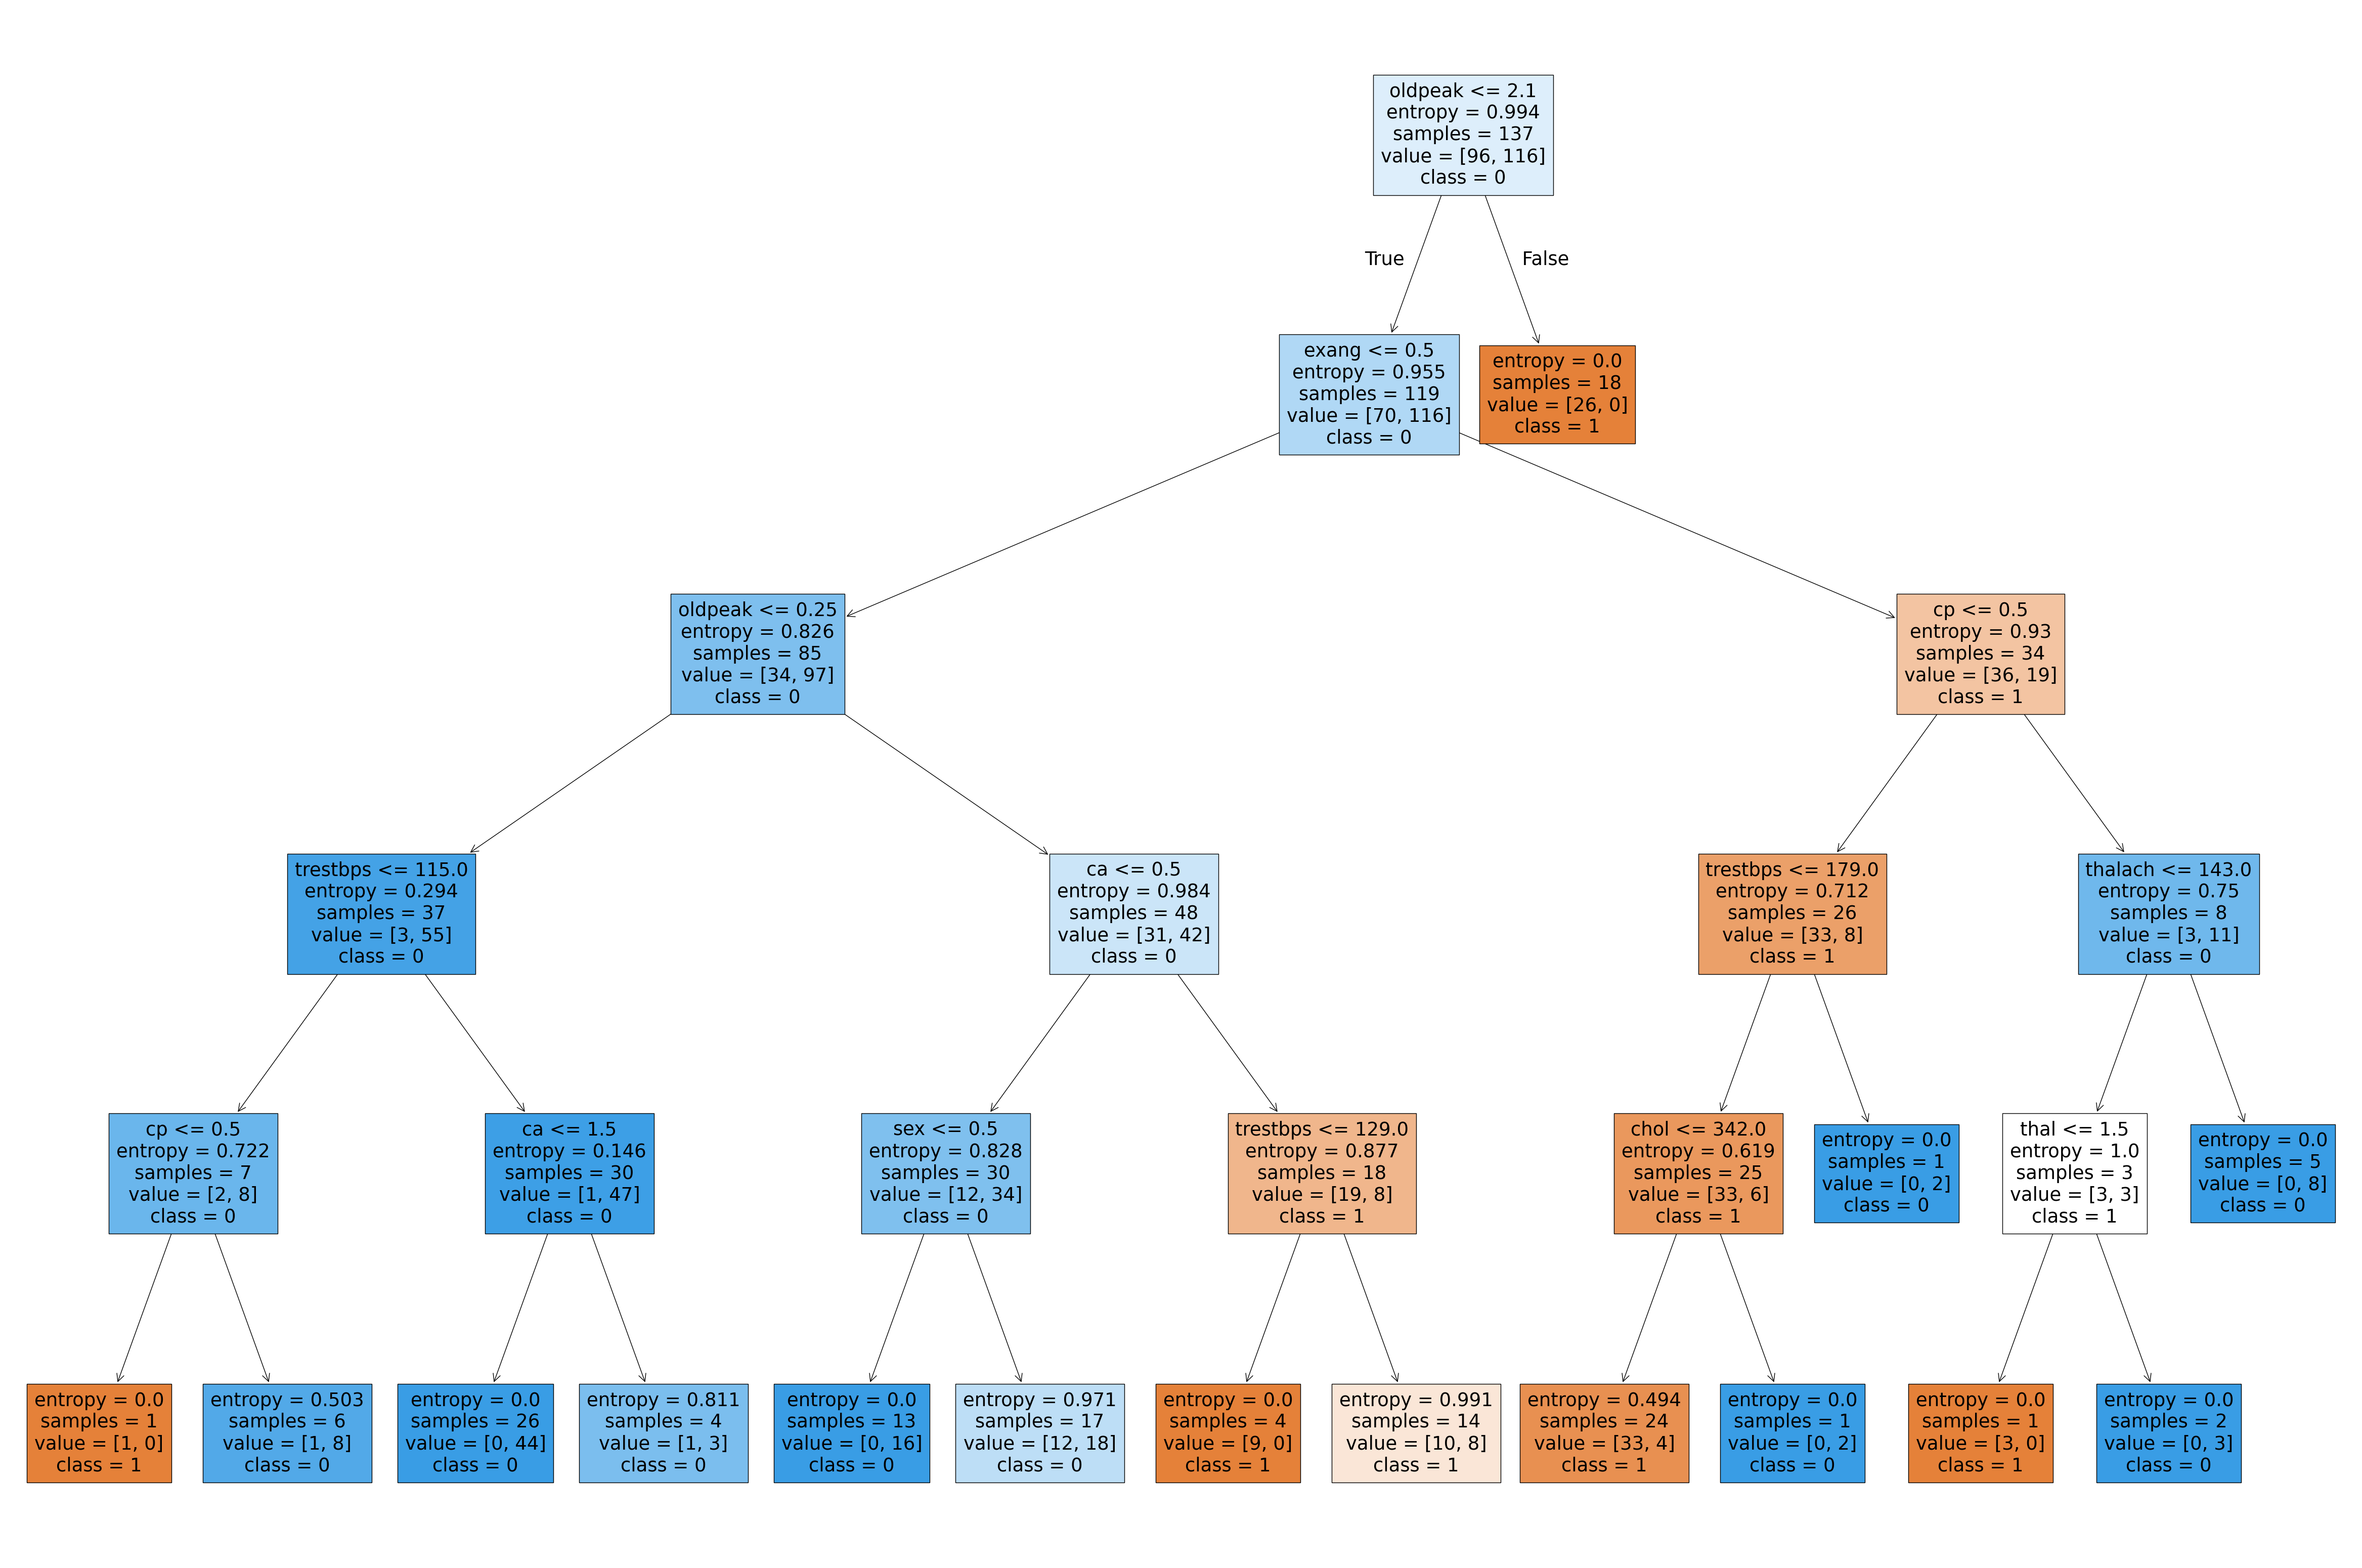

In [133]:
# Se importa tree de sklearn
from sklearn import tree
import matplotlib.pyplot as plt

# Tomo el primer árbol de decisión del bosque para dibujar
estimator = clf_rf.estimators_[0]

# Obtengo los nombres de las columnas utilizadas y las clases posibles
feature_names = df.drop('target', axis=1).columns

# Convierto las clases en cadenas de texto para evitar el error
class_names = list(map(str, df['target'].unique().tolist()))

# Se crea el espacio para dibujar con fig = plt.figure(figsize=(16, 9))
fig = plt.figure(figsize=(60,40))
ax = fig.add_subplot()

# Representación gráfica del árbol
tree.plot_tree(estimator,
               feature_names=feature_names,
               class_names=class_names,
               filled=True,
               ax=ax)

# Muestra la figura
plt.show()

# Guarda la imagen
filename = 'hearttree.png'
fig.savefig(filename)

# Validar el modelo Random Forest

In [134]:
# Calcular la exactitud (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test_rf, y_hat_rf, normalize=True)

0.8241758241758241

#### Matriz de confusión para evaluar la precisión del modelo

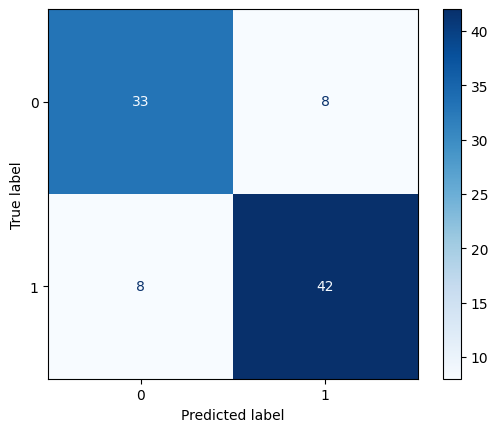

In [137]:
# Se utliza la matriz de confusión para evaluar la precisión de una clasificación.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Necesita dos variables que contengan los valores a comparar
cm = confusion_matrix(y_test_rf, y_hat_rf)

# Código para realizar la representación gráfica con los resultados
# Se crea la varible cmd, que almacena visualization de la Confusion Matrix
# Necesita la variable cm que contiene los resultados de la comparación entre los valores reales y predicción
# display_labels, se especifica las etiquetas de las categorias que se evalúan.
cmd_rf = ConfusionMatrixDisplay(cm, display_labels=clf_rf.classes_)

# Con cmd.plot se especifica el mapa de colores reconocido por matplotlib.
cmd_rf.plot(cmap=plt.cm.Blues)

# Para mostrar la figura
plt.show()

# Utilizar el Modelo


In [138]:
df_prueba = pd.DataFrame({"Age":[28],'sex':[1], 'cp':[2], 'trestbps':[120], 'chol':[240], 'fbs':[1], 'restecg':[2], 'thalach':[71],
       'exang':[0], 'oldpeak':[1.4], 'slope':[2], 'ca':[0], 'thal':[2]})
df_prueba


,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,28,1,2,120,240,1,2,71,0,1.4,2,0,2


In [139]:
X_prueba = df_prueba.values
y_hat_prueba = clf_rf.predict(X_prueba)
y_hat_prueba

array([1])

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predecir usando KNN
y_pred_knn = clf_knn.predict(X_test_knn)

# Predecir usando Random Forest
y_pred_rf = clf_rf.predict(X_test_rf)

# Calcular métricas para KNN
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
precision_knn = precision_score(y_test_knn, y_pred_knn)
f1_knn = f1_score(y_test_knn, y_pred_knn)
confusion_knn = confusion_matrix(y_test_knn, y_pred_knn)

# Calcular métricas para Random Forest
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
precision_rf = precision_score(y_test_rf, y_pred_rf)
f1_rf = f1_score(y_test_rf, y_pred_rf)
confusion_rf = confusion_matrix(y_test_rf, y_pred_rf)

# Mostrar resultados
print("KNN Metrics:")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"F1 Score: {f1_knn:.2f}")
print("Confusion Matrix:\n", confusion_knn)

print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print("Confusion Matrix:\n", confusion_rf)


KNN Metrics:
Accuracy: 0.84
Precision: 0.82
F1 Score: 0.85
Confusion Matrix:
 [[23  6]
 [ 4 28]]

Random Forest Metrics:
Accuracy: 0.82
Precision: 0.84
F1 Score: 0.84
Confusion Matrix:
 [[33  8]
 [ 8 42]]


# Ver el Gráfico "Comparación de Rendimiento: KNN vs Random Forest"

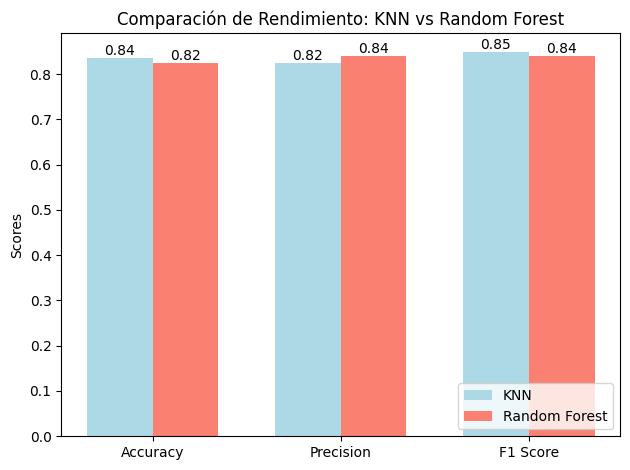

In [143]:
# Definir las métricas
metrics = ['Accuracy', 'Precision', 'F1 Score']
knn_scores = [accuracy_knn, precision_knn, f1_knn]
rf_scores = [accuracy_rf, precision_rf, f1_rf]

# Crear un gráfico de barras
x = np.arange(len(metrics))  # la ubicación de las etiquetas
width = 0.35  # el ancho de las barras

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, knn_scores, width, label='KNN', color='lightblue')
bars2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest', color='salmon')

# Añadir algunas etiquetas y título
ax.set_ylabel('Scores')
ax.set_title('Comparación de Rendimiento: KNN vs Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Mover la leyenda a la parte inferior derecha
ax.legend(loc='lower right')

# Añadir etiquetas en las barras
def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

# Mostrar gráfico
plt.tight_layout()
plt.show()
